# Wavefield Imaging

In many applications, acoustic or electromagnetic waves are harnessed to *see* things; under-water acoustics, radar, sonar, medical ultrasound, ground penetrating radar, seismic imaging, global seismology. In some of these applications the measurements are *passive*; we record waves that are emitted by the object of investigation and we try to infer its location, size, etc. In *active* measurements, waves are generated and the response of the object is recorded. An example of such an application is shown in {numref}`seismic`.

```{figure} images/wavefield_imaging/seismic.png
---
height: 150px
name: seismic
---
Acquisition setup of a bat and an active marine seismic survey.
```

In order to treat the inverse problem, we must first understand the *forward problem*. In its most rudimentary form, the wave-equation is given by

```{math}
:label: waveequation
L[c]v(t,x) = q(t,x),
```

with

$$
L[c] = \left[\frac{1}{c(x)^2}\frac{\partial^2}{\partial t^2} - \nabla^2 \right],
$$

and where $v : \mathbb{R} \times \mathbb{R}^n \rightarrow \mathbb{R}$ denotes the wavefield, $c : \mathbb{R}^n \rightarrow \mathbb{R}$ is the speed of propagation and $q : \mathbb{R} \times \mathbb{R}^n \rightarrow \mathbb{R}$ is a source term. We will assume that the source has compact support in both space and time and is square integrable.

To define a unique solution of {eq}`waveequation` we need to supply boundary and initial conditions. In the applications discussed above one typically considers an unbounded domain ($x \in \mathbb{R}^n$) and Cauchy initial conditions $v(0,x) = 0$, $\frac{\partial v}{\partial t}(0,x) = 0$.

In scattering experiments it is common to rewrite the wave-equation in terms of an incoming and a scattered wavefield, $v = v_i + v_s$, and a scattering potential, $u(x) = c(x)^{-2} - c_0^{-2}$:

```{math}
:label: scattering
L[c_0]v_i(t,x) = q(t,x), \quad L[c_0]v_s(t,x) = -u(x)\frac{\partial^2 v}{\partial t^2}(t,x).
```

Under a *weak scattering* assumption, we may ignore the interaction of $u$ and $v_s$ and replace $v$ in {eq}`scattering` by $v_i$.

The measurements are typically taken to be the (scattered) wavefield restricted to $[0,T] \times \Delta$ where $\Delta \subset \mathbb{R}^n$ may be a manifold or a set of points. The data may then be denoted by $f(t,r)$.
In active experiments, it is common practice to consider measurements for a collection of source terms. The sources may be point-sources, in which case $q(t,x) = w(t)\delta(x - s)$ with $s \in  \Sigma$. Alternatively, the incident field $v_i$ may be given and parametrized by $s \in  \Sigma$. We may then denote the data by $f(t,s,r)$ with $s\in \Sigma$, $r\in \Delta$ and $t\in [0,T]$.

Based on this basic setup, we will discuss three possible inverse problems:

* **Inverse source problem:** Recover the source $q$ from the measurements for known (and constant) $c(x)\equiv c_0$.

* **Inverse scattering:** Recover the scattering potential $u(x)$ from measurements of the scattered field for multiple (known) sources, assuming that $c_0$ is known.

* **Waveform tomography:** Recover $c(x)$ from measurements of the total wavefield for multiple (known) sources.

Below you will find some typical examples of inverse problems that come up in practice.

* **Earth-quake localization:** An earthquake described by a source term $w(t)q(x)$ is recorded by multiple seimosgraphs at locations $\Delta = \{r_k\}_{k=1}^n$. The goal is to recover $q$ in order to determine the location of the earthquake.

* **Passive sonar:** Soundwaves emitted from an unidentified target are recorded using an array $\Delta = \{x_0 + rp \, | \, r\in[-h,h] \}$, where $p\in\mathbb{S}^2$ denotes the orientation of the array and $h$ its width. The goal is to recover the source term $w(t)q(x)$ to determine the origin and nature of the source.

* **Radar imaging:** Incident plane waves, parametrized by direction $s \in \Sigma \subset \mathbb{S}^{2}$, are send into the medium and their reflected response is recorded by an array. The goal is retreive the scattering potential.

* **Full waveform inversion:** In exploration seismology, the goal is to recover $c$ from measurements of the total wavefield on the surface: $\Sigma = \Delta = \{x \,|\, n\cdot x = 0\}$.

* **Ultrasound tomography:** The goal is to recover $c$ from the total wavefield for sources and receivers surrounding the object.


A few prominent examples of acquisition setups we will consider here are the following:

* **Point-sources:** $q(t,x) = w(t)\delta(x - s)$.
\item Incoming plane waves with frequency $\omega$ and direction $\xi$: $v_i(t,x) = \sin(\omega(t - \xi\cdot x/c))$

* **Point-measurements along a hyperplane:** $\Delta = \{x \in \mathbb{R}^n\, |\, n\cdot x = x_0\}$.

* **Point-measurements on the sphere:** $\Delta = \{x \in \mathbb{R}^n \, | \, \|x\| = \rho\}$.


We will further assume that the quantities of interest are compactly supported in both space and time and that the measurement time $T$ is large enough to capture all the required information. This situation is sketched in {numref}`assumption`.

```{figure} images/wavefield_imaging/assumption.png
---
height: 150px
name: assumption
---
All information on the compactly supported source term is captured in the light cone defined by  $t = c\cdot x$. We assume that $T$ is large enough to capture the complete intersection of the light cone with $\Delta$.
```

## Forward modelling

### Analytic solution
For a general source term we may express the solution as a convolution

$$
v(t,x) = \int\!\!\int g(t-t',x,x') q(t',x')\mathrm{d}t'\mathrm{d}x',
$$

where $g$ is the Green function, obeying

$$
L[c]g(t,t',x,x') =  \delta(t-t')\delta(x-x').
$$

For $c(x) \equiv c$ we have $g(t,t',x,x')\equiv g(t-t',x-x')$ and the Green functions are given by:

$$
g(t,x) = \frac{1}{2c}H(t - |x|/c),
$$

for $n=1$,

$$
g(t,x) = \frac{1}{2\pi c\sqrt{c^2t^2 - |x|^2}}H(t - |x|/c),
$$

for $n=2$, and

$$
g(t,x) = \frac{1}{4\pi |x|} \delta(t - |x|/c),
$$

for $n=3$. Note that these are the *causal* Green functions; they propagate information forward in time. The \*a-causal* or *time-reversed* Green functions also satisfy the wave-equation.

The solution for non-constant $c$ can be constructed by solving an integral equation 

$$
v = g_0*q - g_0*\left(u\cdot \frac{\partial^2 v}{\partial t^2}\right),
$$

where $*$ denotes convolution, $g$ is the Green function for $c(x) \equiv c_0$ and $u = c^{-2} - c_0^{-2}$.

### Numerical modelling
For non-constant $c$, such closed-form expression are generally not available. The most basic method for solving the wave equation numerically is the Leap-Frog method. For $n=1$, the method may be expressed as follows. Introducing $v_{ij} \equiv v(i\Delta t, j\Delta x)$ we have

$$
\frac{v_{i+1,j} - 2v_{i,j} + v_{i-1,j}}{c_{ij}^2\Delta t^2} - \frac{v_{i,j+1} - 2v_{i,j} + v_{i,j-1}}{\Delta x^2} = q_{ij} + \mathcal{O}(\Delta x^2) + \mathcal{O}(\Delta t^2).
$$

We need to truncate the spatial domain to $[-L,L]$ in order to compute solutions. We need boundary conditions that will let waves leave the domain with reflecting of the artificial boundary. The simplest are so-called radiation boundary conditions, that impose a one-way wave equation in the direction normal to the boundary:

$$
\frac{\partial v}{\partial t}(t,\pm L) = \pm c(\pm L)\frac{\partial v}{\partial x}(t,\pm L),
$$

which can be discretized using finite-differences as well.

Ignoring the higher order terms leads to

$$
\widetilde v_{i+1,j} = 2\widetilde v_{i,j} - \widetilde v_{i-1,j} + \frac{c_{ij}^2\Delta t^2}{\Delta x^2}\left(\widetilde v_{i,j+1} - 2\widetilde v_{i,j} + \widetilde v_{i,j-1} + \widetilde q_{i,j}\right),\quad j=-J+1, \ldots, J-1,
$$

and

$$
\widetilde{v}_{i+1,-J} = \widetilde{v}_{i,-J} + \frac{c_{i,-J}\Delta t}{\Delta x}\left(\widetilde v_{i,-J+1} - \widetilde v_{i,-J}\right),
$$

$$
\widetilde{v}_{i+1,J} = \widetilde{v}_{i,J} + \frac{c_{i,J}\Delta t}{\Delta x}\left(\widetilde v_{i,J} - \widetilde v_{i,J-1}\right),
$$

with $\widetilde v_{0,j} = \widetilde v_{1,j} = 0$ and $\widetilde q_{i,j} = \Delta x^2 q(i\Delta t, j \Delta x)$.

The *accuracy* of the approximation follows directly from the higher order terms we left out. Another important aspect is *stability*, which tells us how errors propagate. Since the equations are all linear, errors will propagate according to the same recursion relation. One way of studying this is *von Neumann stability analysis*, where we study the behaviour of individual components of the error: $e_{ij} = g^i\exp(\imath j\theta)$. This yields to following quadratic equation for $g$:

$$
g^2 - 2g + 1 = 2\gamma g(\cos(\theta\Delta x)-1),
$$

with $\gamma = \frac{c\Delta t}{\Delta  x}$. To ensure stability, we need $|g|\leq 1$ for all $\theta$, which requires that $\gamma\leq 1$.

## Analysis

### Source localization
Define forward map

$$
f = Kq,
$$

with

$$
Kq(t,x) = \int\int g(t-t',x-x')q(t',x')\mathrm{d}x'\mathrm{d}t'.
$$

Data are measured at locations $x \in \Delta$ and $t\in[0,T]$.

* **Uniqueness.** Can we find sources $r_0$ for which $\|Kr_0\| = 0$? Yes! First define $w_0(t,x)$ compactly supported in $[0,T] \times \Omega$ so that $w_0(t,x) = 0$ for $x\in P$ and set

$$
r_0(t,x) = L[c]w_0(t,x),
$$

then $Kr_0 = w_0$, which is zero for $x\in \Delta$ and $t\in[0,T]$.

* **Stability.** We can also construct sources that radiate an arbitraliy small amount of energy by picking $w_{\epsilon}$ such that $\|w_{\epsilon}\| = \mathcal{O}(\epsilon)$ and $\|Lw_{\epsilon}\| = \mathcal{O}(1)$ as $\epsilon\downarrow 0$. Then $K(q + r_{\epsilon}) = d + w_{\epsilon}$ and small perturbation in data leads to large perturbation in the solution.

This will be explored in more detail in the assignments.

### Inverse scattering
Under the weak scatterin assumption, the scattered field is given by

$$
v_s(t,x) = \int\int u(x')\frac{\partial^2 v_i}{\partial t^2}(t',x')g(t-t',x,x')\mathrm{d}t'\mathrm{d}x',
$$

which we measure at $x \in \Delta$ and $t\in [0,T]$. Can we construct $u$ such that $u(x')\frac{\partial^2 v_i}{\partial t^2}(t',x')$ is a non-radiating source? Following the approach described earlier, we start with $w_0(t,x)$ which is zero for $x \in \Delta$. Then, we want to decompose the resulting non-radiating source in two components: $u \cdot \frac{\partial^2 v_i}{\partial t^2}$. We can probably manage this for one incoming wavefield, but can we find a potential that is non-scattering for multiple incoming waves?
In the assignments we will explore non-radiating sources in more detail.

## Reconstruction

### Inverse source problem
We study a variant of the inverse source problem in which $q(t,x) = \delta(t)u(x)$ and $u$ is compactly supported on $\Omega \subset \mathbb{R}^n$. The foward operator for constant $c$ is given by

$$
Ku(t,x) = \int_{\Omega} u(x')g(t,x-x') \mathrm{d}x',
$$

with measurements on the sphere with radius $\rho$.
A popular techique to solve the inverse problem is *backpropagation*, which is based on applying the adjoint of the forward operator to the data. The adjoint operator in this case is given by

$$
K^* f(x) = \int_{\Delta}\int_0^T g(t',x'-x)f(t',x') \mathrm{d}x'\mathrm{d}t'.
$$

We see that $p = K^* f$ can be obtained by solving

$$
L[c]w(t,x) = \int_{\Delta}f(t,x')\delta(x-x')\mathrm{d}x',
$$

using the time-reversed Green function and evaluating at $t=0$, i.e. $p(x) = w(0,x)$.

To see why this works, we study the normal operator
$K^*K$. In the temporal Fourier domain, for $c = 1$, the operator becomes

$$
\widehat{f}(\omega,x) = \int_{\Omega}  u(x') \frac{\exp(\imath\omega|x-x'|)}{|x-x'|}\mathrm{d}x',
$$

and

$$
u(x) = \int \int_{\Delta} \widehat{f}(\omega,x') \frac{\exp(-\imath\omega|x'-x|)}{|x'-x|} \mathrm{d}x'\mathrm{d}\omega.
$$

so

$$
K^* Ku(x) = \int \int_{\Delta}\int_{\Omega} f(x') \frac{\exp(\imath\omega|x''-x'|)}{|x''-x'|} \frac{\exp(-\imath\omega|x''-x|)}{|x''-x|} \mathrm{d}x'\mathrm{d}x''\mathrm{d}\omega.
$$

For $|x''| \gg |x|$ we can approximate it as $|x'' - x| \approx |x''| + x\cdot x''/|x''|$ and likewise for $|x'' - x'|$. This is called the *far-field approximation*. Introducing $\xi'' = x''/|x''| = x''/\rho$ on the unit sphere, we find

$$
K^* {K}u(x) = \rho\int_{\Omega} u(x') \int\int\exp(\imath\omega \xi''\cdot(x'-x)) \mathrm{d}\xi''\mathrm{d}\omega\mathrm{d}x'.
$$

The kernel

$$
k(x-x') = \int\int \exp(\imath\omega \xi''\cdot(x'-x)) \mathrm{d}\xi''\mathrm{d}\omega,
$$

is sometimes refered to as the *point-spread function*.

Under ideal conditions, i.e, measurements are available for *all* frequencies $\omega\in\mathbb{R}$, integration over $\omega$ yields

$$
k(x) = \int \delta(\xi\cdot x) \mathrm{d}\xi.
$$

We only get contributions to the integral for directions orthogonal to $x$, because $\delta(\xi\cdot x)=0$ whenever $\xi\cdot x \not=0$. We thus integrate over a circle only. Substituting $\xi \cdot x = |\xi| |x| \cos \theta  = |x|\cos \theta$ we obtain

$$
k(x) = \frac{1}{|x|}\int_0^{2\pi} \delta(|x|\cos\theta) \mathrm{d}\theta = \frac{1}{|x|}.
$$

Thus with a perfect acquisition we have $k(x' - x) = \frac{1}{|x - x'|}$. Since this corresponds to the Green function of the Poisson equation, it suggests that we may retrieve $u$ by applying a filter to the backprojected data:

$$
u = \nabla^2 (K^*f).
$$

This filtering can also be implemented in the Fourier domain by multiplying by $|\xi|^2$. An example is shown below.

In [9]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.sparse as sp
from scipy.ndimage import laplace

def solve(q,c,dt,dx,T=1.0,L=1.0,n=1):
    '''Solve n-dim wave equation using Leap-Frog scheme: u_{n+1} = Au_n + Bu_{n-1} + Cq_n'''
    # define some quantities
    gamma = dt*c/dx
    nt = int(T/dt + 1)
    nx = int(2*L/dx + 2)
    #
    q = np.resize(q,(nx**n,nt))
    # define matrices
    A,B,C,L = getMatrices(gamma,nx,n)

    # main loop
    u = np.zeros((nx**n,nt))
    
    for k in range(1,nt-1):
        u[:,k+1] = A@u[:,k] + L@u[:,k] + B@u[:,k-1] + (dx**2)*C@q[:,k]

    return u
    
def getMatrices(gamma,nx,n):

    # setup matrices
    l = (gamma**2)*np.ones((3,nx))
    l[1,:] = -2*(gamma**2)
    l[1,0] = -gamma
    l[2,0] = gamma
    l[0,nx-2] = gamma
    l[1,nx-1] = -gamma

    if n == 1:
        a = 2*np.ones(nx)
        a[0] = 1
        a[nx-1] = 1

        b = -np.ones(nx)
        b[0] = 0
        b[nx-1] = 0

        c = (gamma)**2*np.ones(nx)
        c[0] = 0
        c[nx-1] = 0

        L = sp.diags(l,[-1, 0, 1],shape=(nx,nx))

    else:
        a = 2*np.ones((nx,nx))
        a[0,:] = 1
        a[nx-1,:] = 1
        a[:,0] = 1
        a[:,nx-1] = 1
        a.resize(nx**2)

        b = -np.ones((nx,nx))
        b[0,:] = 0
        b[nx-1,:] = 0
        b[:,0] = 0
        b[:,nx-1] = 0
        b.resize(nx**2)

        c = (gamma)**2*np.ones((nx,nx))
        c[0,:] = 0
        c[nx-1,:] = 0
        c[:,0] = 0
        c[:,nx-1] = 0
        c.resize(nx**2)

        L = sp.kron(sp.diags(l,[-1, 0, 1],shape=(nx,nx)),sp.eye(nx)) + sp.kron(sp.eye(nx),sp.diags(l,[-1, 0, 1],shape=(nx,nx)))

    A = sp.diags(a)
    B = sp.diags(b)
    C = sp.diags(c)

    return A,B,C,L

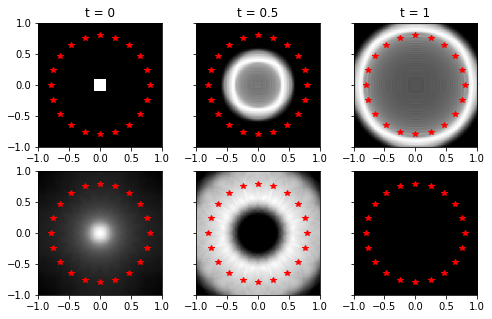

In [12]:
# parameters
L = 1.0
T = 1.0
dx = 1e-2
dt = .5e-2
nt = int(T/dt + 1)
nx = int(2*L/dx + 2)
c = 1

# define source term
u = np.zeros((nx,nx))
u[nx//2 - 10:nx//2+10,nx//2 - 10:nx//2+10] = 1
q = np.zeros((nx*nx,nt))
q[:,1] = u.flatten()

# forward solve
w_forward = solve(q,c,dt,dx,T=T,L=L,n=2)

# sample wavefield
theta = np.linspace(0,2*np.pi,20,endpoint=False)
xs = 0.8*np.cos(theta)
ys = 0.8*np.sin(theta)
I = np.ravel_multi_index(np.array([[xs/dx + nx//2],[ys//dx + nx//2]],dtype=np.int), (nx,nx))
d = w_forward[I,:]

# define adjoint source
r = np.zeros((nx*nx,nt))
r[I,:] = d
r = np.flip(r,axis=1)

# adjoint solve
w_adjoint = solve(r,c,dt,dx,T=T,L=L,n=2)

# plot
fig, ax = plt.subplots(nrows=2, ncols=3, figsize=(8, 5), sharey=True)
plt.gray()

ax[0,0].plot(xs,ys,'r*')
ax[0,0].imshow(w_forward[:,2].reshape((nx,nx)), extent=(-L,L,-L,L))
ax[0,0].set_title('t = 0')
ax[0,1].plot(xs,ys,'r*')
ax[0,1].imshow(w_forward[:,101].reshape((nx,nx)), extent=(-L,L,-L,L))
ax[0,1].set_title('t = 0.5')
ax[0,2].plot(xs,ys,'r*')
ax[0,2].imshow(w_forward[:,200].reshape((nx,nx)), extent=(-L,L,-L,L))
ax[0,2].set_title('t = 1')

ax[1,0].plot(xs,ys,'r*')
ax[1,0].imshow(w_adjoint[:,200].reshape((nx,nx)), extent=(-L,L,-L,L))
ax[1,1].plot(xs,ys,'r*')
ax[1,1].imshow(w_adjoint[:,101].reshape((nx,nx)), extent=(-L,L,-L,L))
ax[1,2].plot(xs,ys,'r*')
ax[1,2].imshow(w_adjoint[:,2].reshape((nx,nx)), extent=(-L,L,-L,L))

plt.show()

### Inverse scattering

Assuming point sources for the incident field, $c = 1$, and a compactly supported $u$, we can express the forward operator as

$$
Ku(t,r,s) = \int_{\Omega} u(x) \frac{\delta''(t - |x - r| - |x - s|))}{|x - r||x - s|}\mathrm{d}x,
$$

so the data $f(t,s,r)$ is the integral of the scattering potential, $u$, along an ellips. Conversely, we can think of the response of a single scattering point $x'$ as a hyperbola in $(t,s,r)$. This is illustrated in {numref}`ellips`.

The adjoint operator here is given by

$$
K^* f(x) = \int_\Delta \int_\Sigma \int_{0}^T f(t,r,s)\frac{\delta''(t - |x - r| - |x - s|))}{|x - r||x - s|} \mathrm{d}t\mathrm{d}s\mathrm{d}r.
$$

As with the inverse source problem, applying the adjoint already yields an image. This is called *migration* in practice.

The foward operator has a nice expression in the Fourier domain when using far field measurements. The derivation is left as an excersise.

```{figure} images/wavefield_imaging/scattering.png
---
height: 150px
name: ellips
---
A single data point $f(t,s,r)$ is the integral of the scattering potential along an ellips: $|x - s| + |x - r| = t$. Likewise, a single point of $f(x)$ contributes to $d$ along a hyperola $t = |x - s| + |x - r|$.
```

### Waveform tomography

Here, we aim to recover $c$ directly from a non-linear equation

$$
K(c) = f,
$$

where $K$ solves $L[c]v = \delta(\cdot - s)w$ and samples the solution. i.e.,

$$
f(t,s,r) = \int g(t-t',r,s)w(t')\mathrm{d}t'
$$

for $t\in [0,T]$, $s\in \Sigma$ and $r\in\Delta$.

We can solve such a non-linear equation using Newton's method:

$$
c_{k+1} = c_k - D{K}(c_k)^{-1}({K}(c_k) - d),
$$

where $DK(c_k)$ denotes the *Fréchet derivative* which generalizes the notion of a derivative and obeys

$$
\lim_{\|h\|\rightarrow 0} \frac{\|K(c + h) - {K}(c) - DK(c)h\|}{\|h\|} = 0.
$$

We find

$$
DK(c)\delta c = -\int\int \frac{\delta c (x')}{2c(x')}\frac{\partial^2 v}{\partial t^2}(t',x')g(t-t',x-x')\mathrm{d}t'\mathrm{d}x',
$$

where the incident field, $v$, satisfies $L[c]v = \delta(\cdot - s)w$. In a finite-dimensional setting, $DK$ would be the Jacobian of $K$.

Approximating the inverse using backprojection we obtain

$$
c_{k+1} = c_k - \alpha_k DK(c_k)^{\dagger}(K(c_k) - d),
$$

where $\alpha_k$ is a scaling factor. Again, we see that backprojection plays a prominant role. It turns out that this iteration is equivalent to a steepest descent method applied to $J(c) = \|K(c) - d\|^2$.